<a href="https://colab.research.google.com/github/ALK26/Projects/blob/master/Canada_Immigration_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The Dataset: Immigration to Canada from 1980 to 2013
# Dataset Source: International migration flows to and from selected countries - The 2015 revision.
# The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

# We will focus on the Canadian immigration data.

# import two key data analysis modules: pandas and Numpy.

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

#s download and import primary Canadian Immigration dataset using pandas read_excel() method. 
# Normally, before we can do that, we would need to download a module which pandas requires to read in excel files. 
# This module is xlrd. For convenience, have pre-installed this module, Otherwise, would need to run the following line of code to install the xlrd module:
# !conda install -c anaconda xlrd --yes



In [2]:
# Read data.

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
# view the top 5 rows of the dataset using the head() function.

df_can.head()


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [4]:
# bottom 5 rows
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407


In [5]:
# analyzing a dataset, start by getting basic information about dataframe by using the info() method.
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [6]:
# Get the list of column headers - call upon .columns parameter.

df_can.columns.values 

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [7]:
# To get the list of indicies - use the .index parameter. 

df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
# Note: The default type of index and columns is NOT list.
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [9]:
# To get the index and columns as lists, use the tolist() method.

df_can.columns.tolist()
df_can.index.tolist()

print (type(df_can.columns.tolist()))
print (type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


In [10]:
# To view the dimensions of the dataframe, use the .shape parameter.

# size of dataframe (rows, columns)
df_can.shape    

(195, 43)

In [11]:
# Note: The main types stored in pandas objects are float, int, bool, datetime64[ns] and datetime64[ns, tz] (in >= 0.17.0), timedelta[ns], category (in >= 0.15.0), and object (string). In addition these dtypes have item sizes, e.g. int64 and int32.


In [12]:
# Clean the data set to remove a few unnecessary columns. use pandas drop() method
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


In [13]:
# Rename the columns so that they make sense. use rename() method by passing in a dictionary of old and new names

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [14]:
# Will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013:

df_can['Total'] = df_can.sum(axis=1)

In [15]:
# Check to see how many null objects in the dataset:

df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [16]:
# a quick summary of each column in dataframe using the describe() method.

df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [17]:
# Indexing and Selection (slicing)
# Select Column
# There are two ways to filter on a column name:
# Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.
#  -  df.column_name 
# Method 2: More robust, and can filter on multiple columns.
#  -  df['column']  
#  -  df[['column 1', 'column 2']] 


In [18]:
# Filtering on the list of countries ('Country').

df_can.Country  # returns a series

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [19]:
# filtering on the list of countries data for years: 1980 - 1985.

df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe

# notice that 'Country' is string, and the years are integers, for consistency, will convert all column names to string later on.

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


In [20]:
# Select Row
# 3 ways to select rows:
#    df.loc[label]        
        #filters by the labels of the index/column
#    df.iloc[index]       
        #filters by the positions of the index/column

# defaul index of the dataset is a numeric range from 0 to 194. 
# makes it difficult to do a query by a specific country. 
# for example to search for data on Japan, need to know the corressponding index value.
# fixed very easily by setting the 'Country' column as the index using set_index() method.
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

df_can.set_index('Country', inplace=True)



In [21]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [22]:
# optional: to remove the name of the index
df_can.index.name = None
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699


In [23]:
# view the number of immigrants from Japan (row 87) for the following scenarios: 
# 1. The full row data (all columns) 
# 2. For year 2013 
# 3. For years 1980 to 1985

# 1. the full row data (all columns)
print(df_can.loc['Japan'])

# # alternate methods
# print(df_can.iloc[87])
# print(df_can[df_can.index == 'Japan'].T.squeeze())


Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [24]:
# 2. for year 2013
print(df_can.loc['Japan', 2013])

# alternate method
# print(df_can.iloc[87, 36]) # year 2013 is the last column, with a positional index of 36

982


In [25]:
# 3. for years 1980 to 1985
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])
# alternative method
# print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object


In [26]:
# Column names that are integers (such as the years) might introduce some confusion. 
# For example, when referencing the year 2013, might confuse that with the 2013th positional index.
# To avoid this ambuigity, convert the column names into strings: '1980' to '2013'.

df_can.columns = list(map(str, df_can.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers


In [27]:
# Since converted the years to string, declare a variable that will allow to easily call upon the full range of years:

# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years



['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [28]:
# Filtering based on a criteria # To filter the dataframe based on a condition, simply pass the condition as a boolean vector.
# filter the dataframe to show the data on Asian countries (AreaName = Asia).

# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [29]:
# 2. pass condition into the dataFrame
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,17,18,23,26,38,62,54,77,98,186,167,230,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,2,10,9,6,9,9,11,14,10,17,28,14,27,34,13,17,15,12,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,0,0,1,0,2,2,1,1,4,2,2,1,3,6,6,8,7,1,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,16,103,63,44,65,31,36,14,17,4,6,1,3,6,3,4,6,3,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,14,15,27,34,38,93,418,371,286,216,313,241,165,245,259,230,277,348,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,257,400,470,379,430,446,536,729,712,674,897,657,623,591,728,774,9327


In [30]:
# pass mutliple criteria in the same line. 
# filter for AreaNAme = Asia and RegName = Southern Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,0,0,1,0,2,2,1,1,4,2,2,1,3,6,6,8,7,1,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,1,0,1,0,1,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,6,13,4,23,29,32,40,31,66,132,155,104,157,236,272,363,313,404,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [31]:
# review the changes made to dataframe.

print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699


In [32]:
# Visualizing Data using Matplotlib
# Matplotlib: Standard Python Visualization Library
# Matplotlib.Pyplot

# importing Matplotlib and Matplotlib.pyplot 

# using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# *optional: check if Matplotlib is loaded.
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


Matplotlib version:  3.2.2


In [33]:
# *optional: apply a style to Matplotlib.

print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [34]:
# Line Pots (Series/Dataframe)
# A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. 
# It is a basic type of chart common in many fields. Use line plot when you have a continuous data set. 
# These are best suited for trend-based visualizations of data over a period of time.

# case study:
# In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. 
# As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. 
# Can quickly visualize this effort using a Line plot:

# Plot a line graph of immigration from Haiti using df.plot().

# First, extract the data series for Haiti.

haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

In [35]:
haiti.tail()

2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

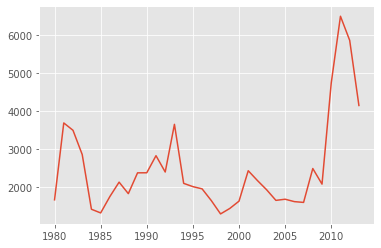

In [36]:
# Next, plot a line plot by appending .plot() to the haiti dataframe.

haiti.plot()

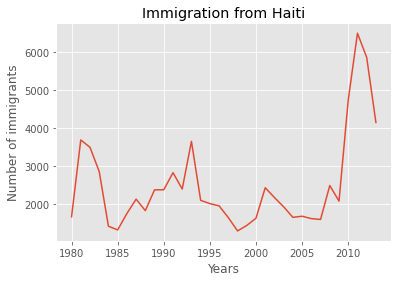

In [37]:
# change the type of the index values to integer for plotting.
# Also, label the x and y axis using plt.title(), plt.ylabel(), and plt.xlabel() 

haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure


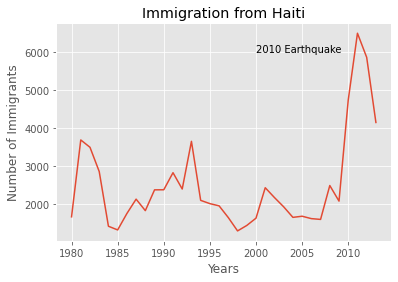

In [38]:
# Can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. 
# Annotate this spike in the plot by using the plt.text() method.

haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 


In [39]:
# Were able to quickly identify and visualize the spike in immigration!

# Quick note on x and y values in plt.text(x, y, label):
#  Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so can just specify the value y = 6000.
  #  plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
# If the years were stored as type 'string', would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
   # plt.text(20, 6000, '2010 Earthquake') # years stored as type int


In [40]:
# Add more countries to line plot to make meaningful comparisons immigration from different countries.

# Compare the number of immigrants from India and China from 1980 to 2013.

# Step 1: Get the data set for China and India, and display dataframe.

df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


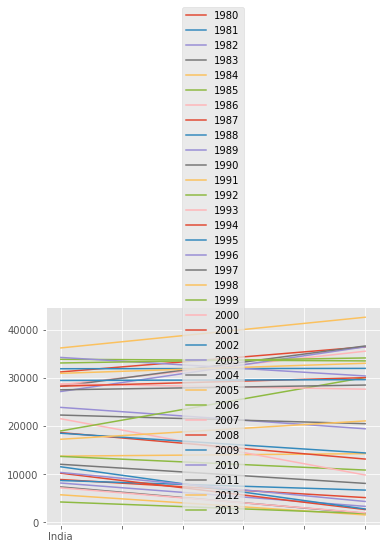

In [41]:
# Step 2: Plot graph. explicitly specify line plot by passing in kind parameter to plot().

df_CI.plot(kind='line')

In [42]:
# That doesn't look right...
# Recall that pandas plots the indices on the x-axis and the columns as individual lines on the y-axis. 
# Since df_CI is a dataframe with the country as the index and years as the columns, must first transpose the dataframe using transpose() method to swap the row and columns.

df_CI = df_CI.transpose()
df_CI.head()

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


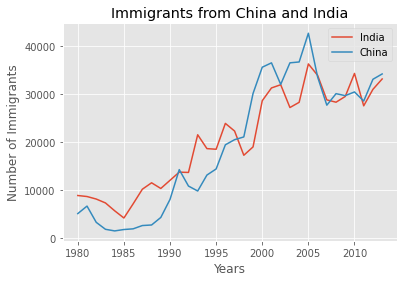

In [43]:
# pandas will auomatically graph the two countries on the same graph. 
# plot the new transposed dataframe. add a title to the plot and label the axes.

df_CI.index = df_CI.index.map(int)  #change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [44]:
# From the above plot, can observe that the China and India have very similar immigration trends through the years.

# Note: How come didn't need to transpose Haiti's dataframe before plotting (like did for df_CI)? because haiti is a series as opposed to a dataframe, and has the years as its indices
# Line plot a handy tool to display several dependent variables against one independent variable. recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.


      India  China  ...  Philippines  Pakistan
1980   8880   5123  ...         6051       978
1981   8670   6682  ...         5921       972
1982   8147   3308  ...         5249      1201
1983   7338   1863  ...         4562       900
1984   5704   1527  ...         3801       668
1985   4211   1816  ...         3150       514
1986   7150   1960  ...         4166       691
1987  10189   2643  ...         7360      1072
1988  11522   2758  ...         8639      1334
1989  10343   4323  ...        11865      2261
1990  12041   8076  ...        12509      2470
1991  13734  14255  ...        12718      3079
1992  13673  10846  ...        13670      4071
1993  21496   9817  ...        20479      4777
1994  18620  13128  ...        19532      4666
1995  18489  14398  ...        15864      4994
1996  23859  19415  ...        13692      9125
1997  22268  20475  ...        11549     13073
1998  17241  21049  ...         8735      9068
1999  18974  30069  ...         9734      9979
2000  28572  

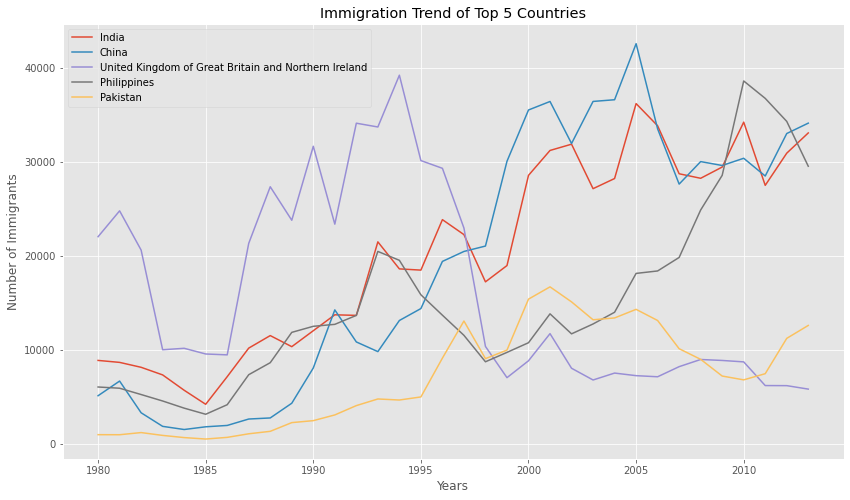

In [45]:
# Compare the trend of top 5 countries that contributed the most to immigration to Canada.

# Step 1: Get the dataset. Recall created a Total column that calculates the cumulative immigration by country. 
# Will sort on this column to get top 5 countries using pandas sort_values() method.

# inplace = True paramemter saves the changes to the original df_can dataframe
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose() 
print(df_top5)

# Step 2: Plot the dataframe. To make the plot more readeable, will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


In [46]:
# Having wrangled data with python and create a line plot with Matplotlib... 
# ...there are many other plotting styles available other than the default Line plot, all of which can be accessed by passing kind keyword to plot(). 
# The full list of available plots are as follows:

# bar for vertical bar plots
# barh for horizontal bar plots
# hist for histogram
# box for boxplot
# kde or density for density plots
# area for area plots
# pie for pie plots
# scatter for scatter plots
# hexbin for hexbin plot

# Exploring Datasets with pandas and Matplotlib

# Dataset: Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website.
# The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. 
# The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals.
# For this lesson, we will focus on the Canadian Immigration data.


In [47]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [48]:
# Visualize plot as a cumulative plot, also knows as a Stacked Line Plot or Area plot.

df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


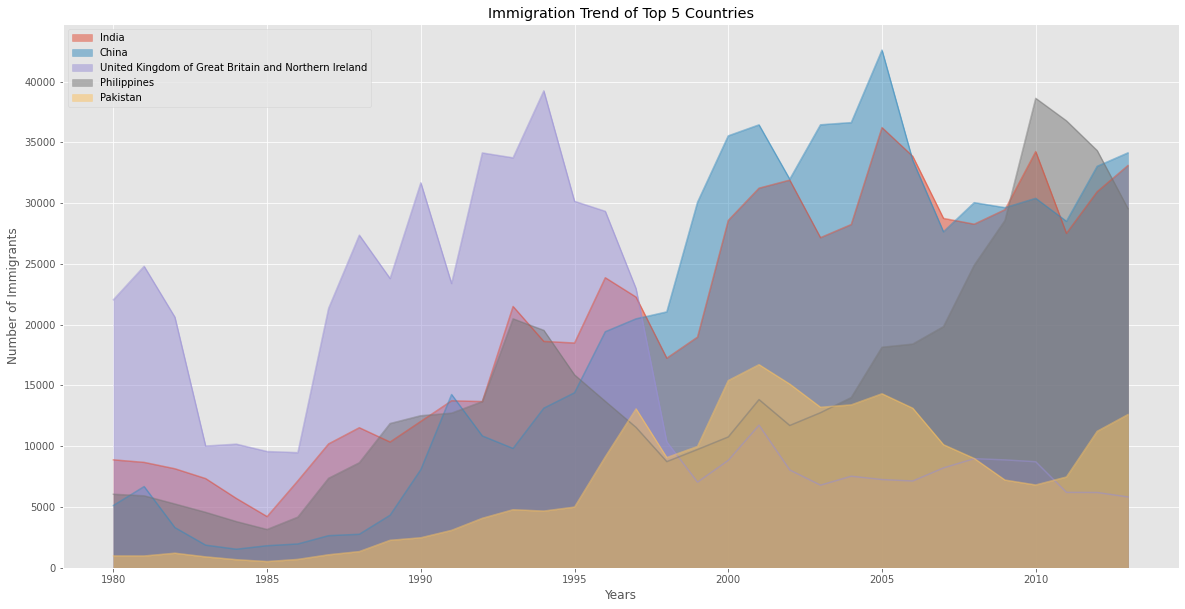

In [49]:
# Area plots are stacked by default. 
# to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). 
# to produce an unstacked plot, pass stacked=False.

df_top5.index = df_top5.index.map(int)  # change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

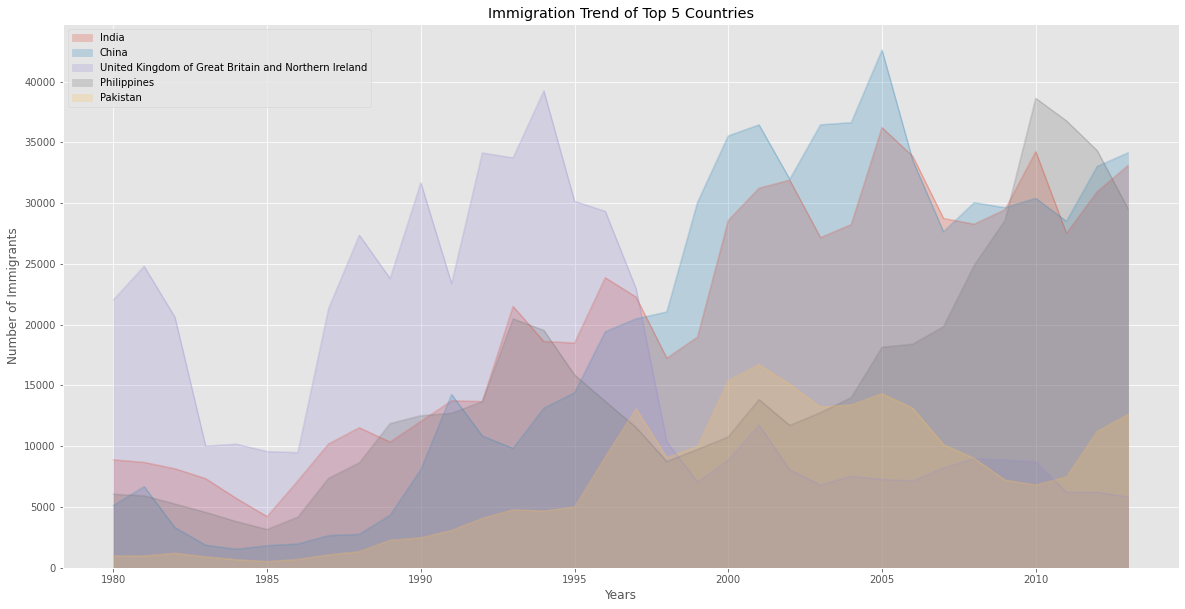

In [50]:
# The unstacked plot has a default transparency (alpha value) at 0.5. can modify this value by passing in the alpha parameter.

df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


Text(0.5, 0, 'Years')

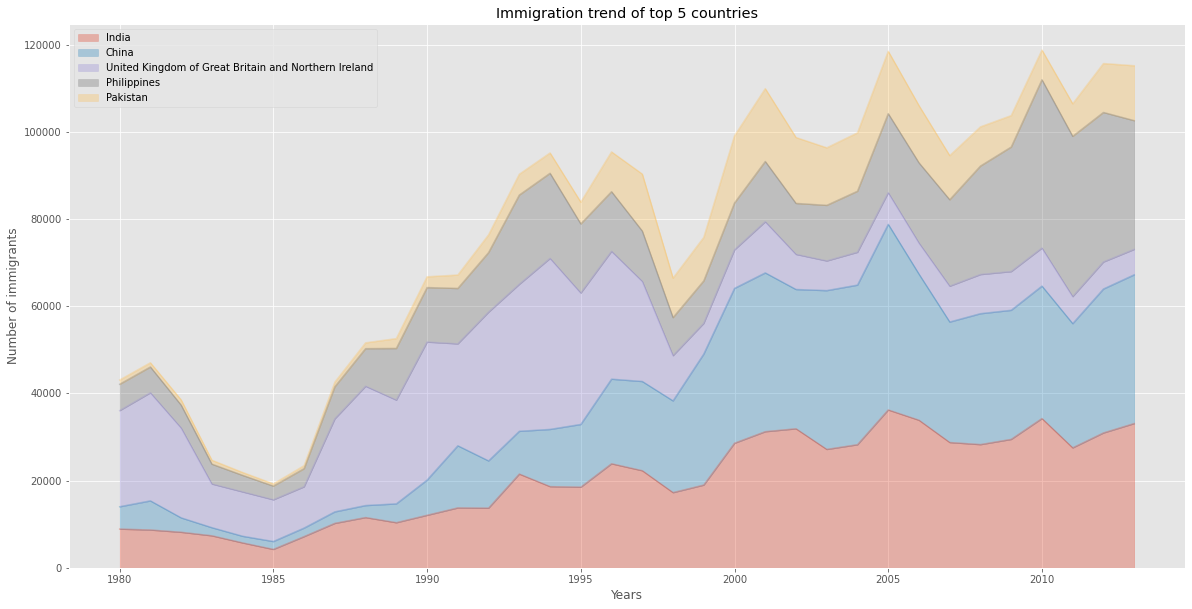

In [51]:
# Two types of plotting
# there are two styles/options of ploting with matplotlib. Plotting using the Artist layer and plotting using the scripting layer.

# *Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' *
#  can use plt i.e. matplotlib.pyplot and add more elements by calling different methods procedurally; for example, plt.title(...) to add title or plt.xlabel(...) to add label to the x-axis.

# Option 1: have been using so far
df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')



Text(0.5, 0, 'Years')

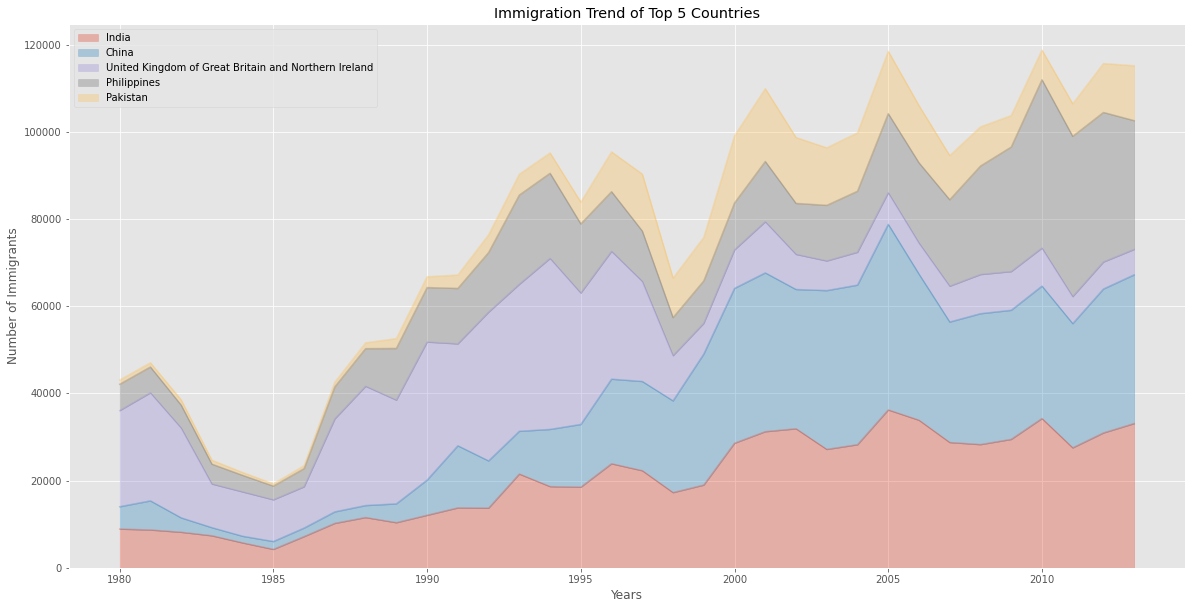

In [52]:
# *Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred) *
# can use an Axes instance of current plot and store it in a variable (eg. ax). can add more elements by calling methods with a little change in syntax (by adding "set_" to the previous methods). 
# For example, use ax.set_title() instead of plt.title() to add title, or ax.set_xlabel() instead of plt.xlabel() to add label to the x-axis.
# This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots).
# will stick to the scripting layer, except for some advanced visualizations where will need to use the artist layer to manipulate advanced aspects of the plots.

# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


In [53]:
# Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. 
# Use a transparency value of 0.45.

df_bottom5 = df_can.tail(5)
df_bottom5= df_bottom5[years].transpose()
df_bottom5.head()

,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


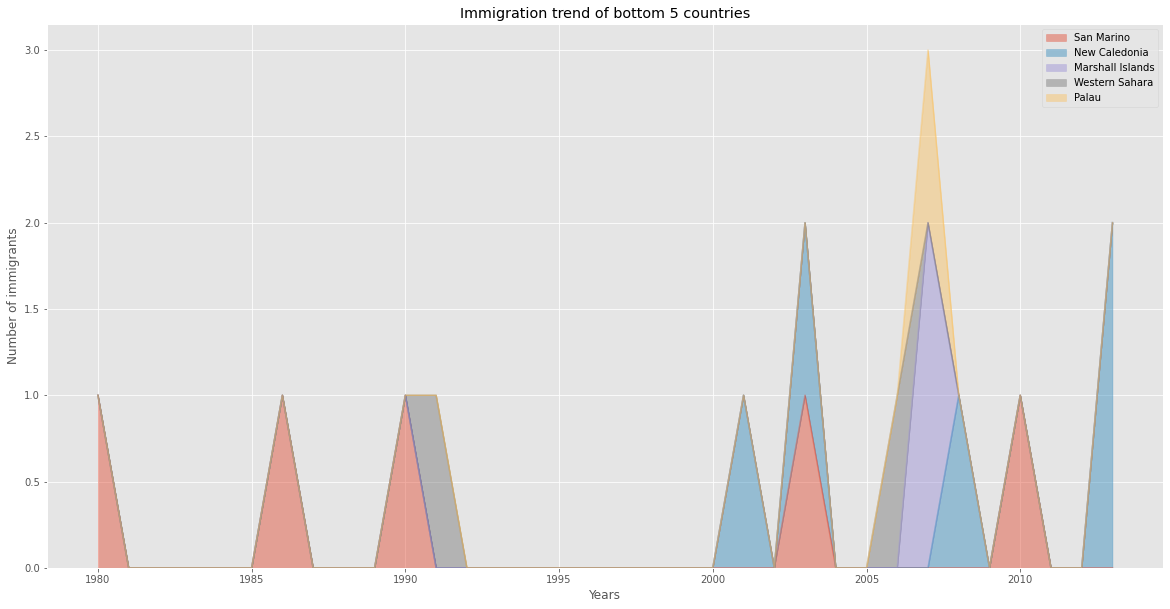

In [54]:
df_bottom5.index=df_bottom5.index.map(int)
df_bottom5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 

plt.title('Immigration trend of bottom 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

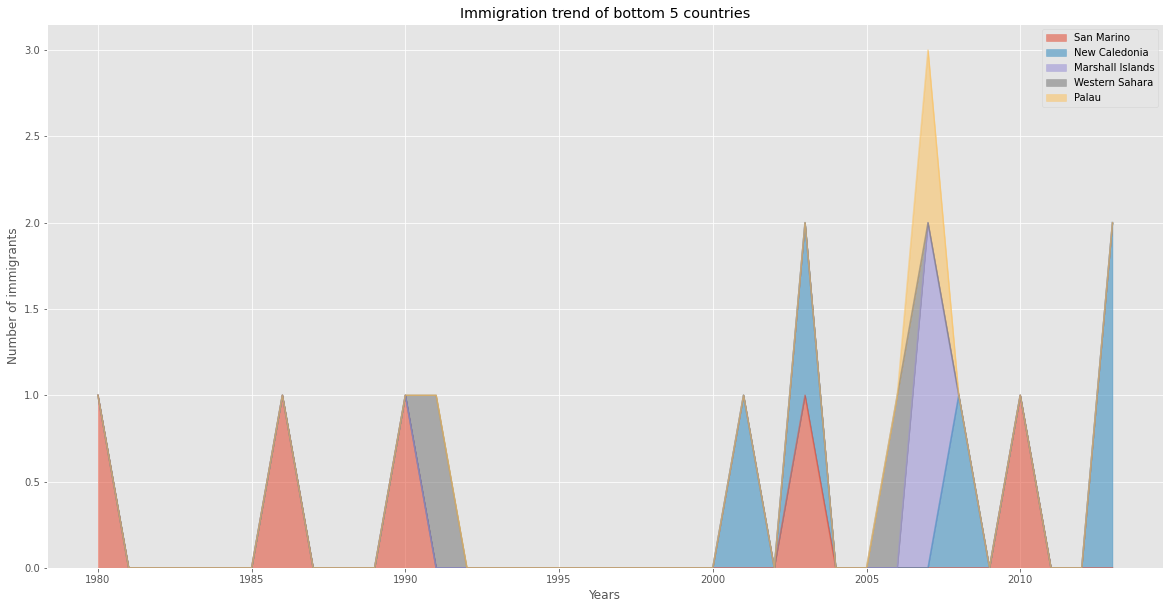

In [55]:
# Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. 
# Use a transparency value of 0.55.

ax = df_bottom5.plot(kind='area', alpha=0.55, figsize=(20, 10)) 
ax.set_title('Immigration trend of bottom 5 countries')
ax.set_ylabel('Number of immigrants')
ax.set_xlabel('Years')

In [56]:
# Histograms is a way of representing the frequency distribution of numeric dataset. 
# it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. 
# So the y-axis is the frequency or the number of data points in each bin. 
# Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

# What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

# First examine the data split into intervals. To do this, usE Numpy's histrogram method to get the bin ranges and frequency counts:
# view the 2013 data
df_can['2013'].head()


India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [57]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

# By default, the histrogram method breaks up the dataset into 10 bins. 
# The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. 

# can see that in 2013:
# 178 countries contributed between 0 to 3412.9 immigrants
# 11 countries contributed between 3412.9 to 6825.8 immigrants
# 1 country contributed between 6285.8 to 10238.7 immigrants, and so on..


[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


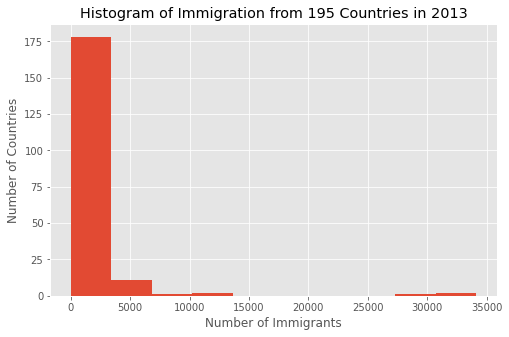

In [58]:
# can graph this distribution by passing kind=hist to plot().

df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()


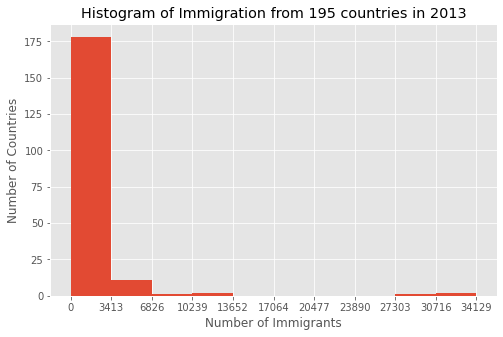

In [59]:
# In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. 
# The y-axis represents the number of countries that contributed to the aforementioned population.
# Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [60]:
# Side Note: could use df_can['2013'].plot.hist(), instead. 
# In fact, using some_data.plot(kind='type_plot', ...) is equivalent to some_data.plot.type_plot(...). 
# That is, passing the type of the plot as argument or method behaves the same.
# See the pandas documentation for more info http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html.


In [61]:
# can also plot multiple histograms on the same plot. For example, answer the following questions using a histogram.
# What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?
# view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Denmark,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140


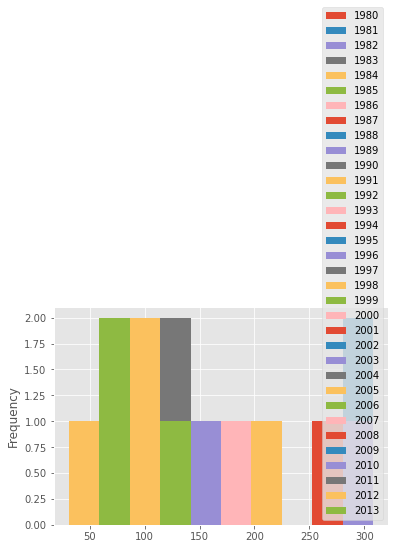

In [62]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [63]:
#That does not look right! Don't worry, often come across situations like this when creating plots. The solution often lies in how the underlying dataset is structured.

# Instead of plotting the population frequency distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.

# can be easily fixed by first transposing the dataset, and then plotting.
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


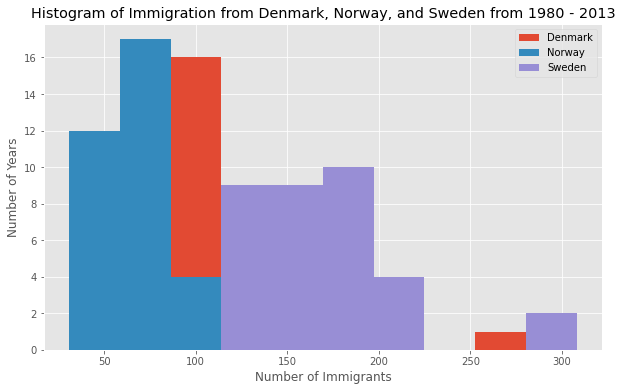

In [64]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

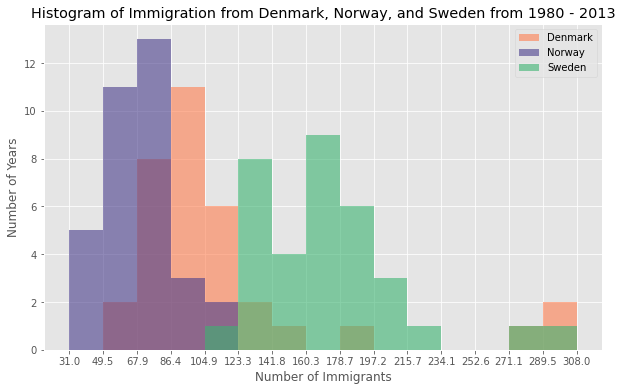

In [65]:
# make a few modifications to improve the impact and aesthetics of the previous plot:

# increase the bin size to 15 by passing in bins parameter
# set transparency to 60% by passing in alpha paramemter
# label the x-axis by passing in x-label paramater
# change the colors of the plots by passing in color parameter

# get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()


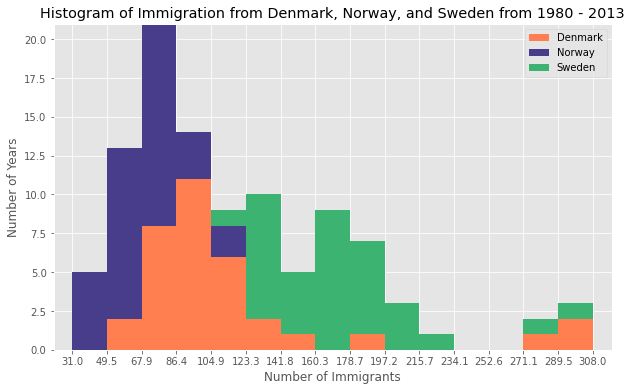

In [66]:
# Tip: For a full listing of colors available in Matplotlib, run the following code in your python shell:
# import matplotlib
# for name, hex in matplotlib.colors.cnames.items():
#    print(name, hex)
# If we do no want the plots to overlap each other, we can stack them using the stacked paramemter. 
# also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. can pass a tuple (min,max) using the xlim paramater

count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

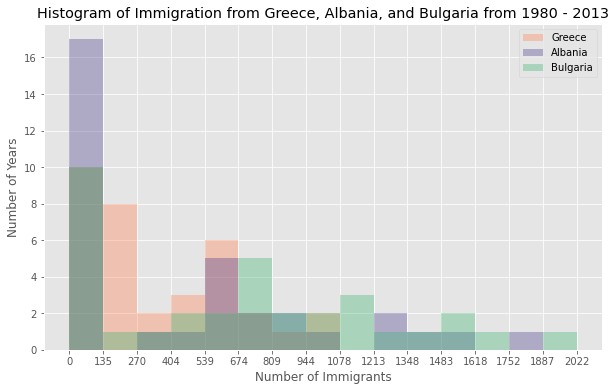

In [67]:
# Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? 
# Use an overlapping plot with 15 bins and a transparency value of 0.35.

df_t = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

# transpose dataframe
df_t = df_t.transpose()
df_t.head()

# get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.35,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [68]:
# Bar Charts - bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. 
# Bar graphs usually represent numerical and categorical variables grouped in intervals.

# To create a bar plot, we can pass one of two arguments via kind parameter in plot():
# kind=bar creates a vertical bar plot
# kind=barh creates a horizontal bar plot

# Vertical bar plot
# In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. 
# Vertical bar graphs are particuarly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.


In [69]:
# start off by analyzing the effect of Iceland's Financial Crisis:

# The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. 
# Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. 
# The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

# compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

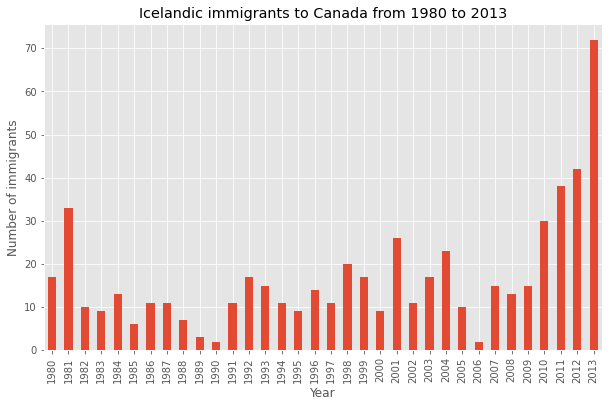

In [70]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

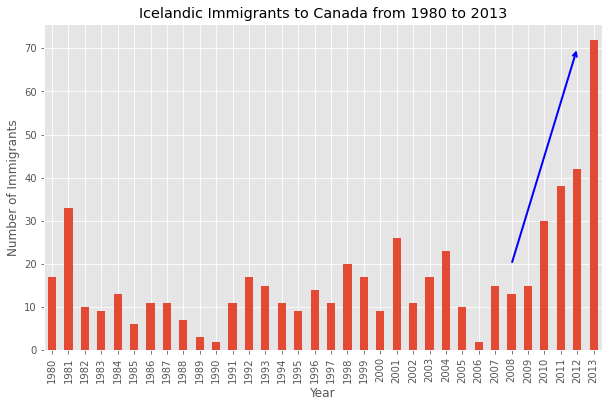

In [71]:
# the bar plot above shows the total number of immigrants broken down by each year. 
# We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

# annotate this on the plot using the annotate method of the scripting layer or the pyplot interface. 
# pass in the following parameters:

# s: str, the text of annotation.
# xy: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
# xytext: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
# xycoords: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
# arrowprops: Takes a dictionary of properties to draw the arrow:
# arrowstyle: Specifies the arrow style, '->' is standard arrow.
# connectionstyle: Specifies the connection type. arc3 is a straight line.
# color: Specifes color of arror.
# lw: Specifies the line width.

df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

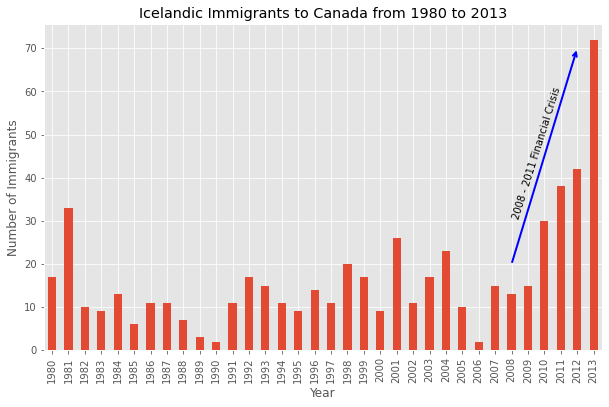

In [72]:
# also annotate a text to go over the arrow. We will pass in the following additional parameters:

# rotation: rotation angle of text in degrees (counter clockwise)
# va: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
# ha: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

In [73]:
# Horizontal Bar Plot - practical to represent the data horizontally, especially if need more room for labelling the bars. 
# In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. 
# will see, there is more room on the y-axis to label categetorical variables.

# Using the scripting layter and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, 
# for the period 1980 - 2013. Label each country with the total immigrant count.


# step 1: Get the data pertaining to the top 15 countries.
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

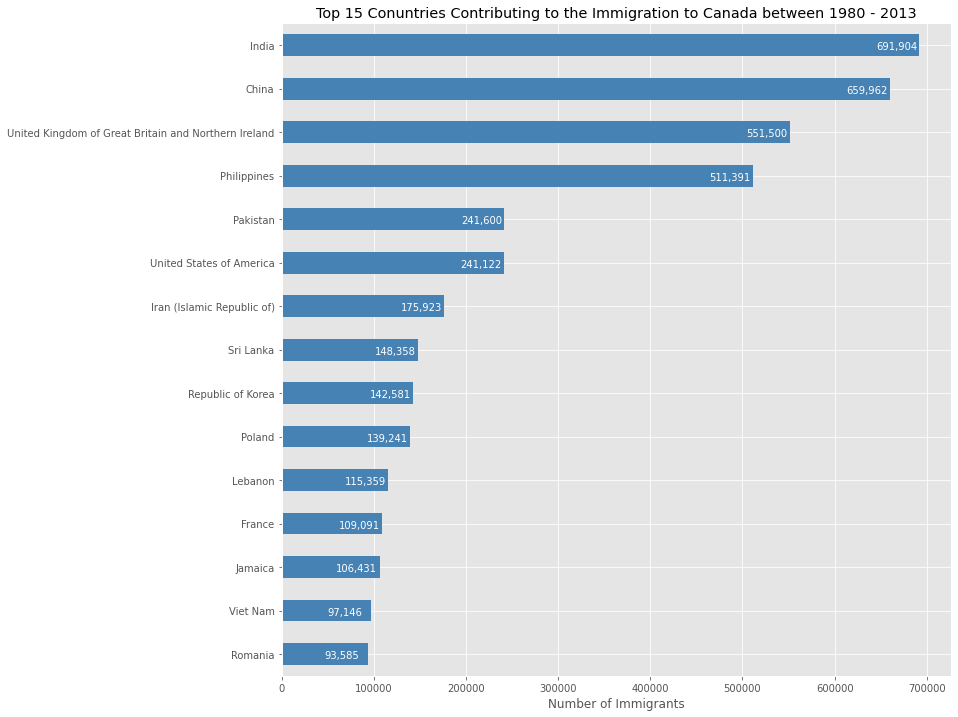

In [74]:
# Step 2: Plot data:

# Use kind='barh' to generate a bar chart with horizontal bars.
# Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
# Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()

In [75]:
# Recap: Cleaned up data. made some modifications to the original dataset to make it easier to create our visualizations. 

# clean up the dataset to remove unnecessary columns (eg. REG) 
# df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# rename the columns so that they make sense
# df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, make all column labels of type string
# df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
# df_can.set_index('Country', inplace=True)

# add total column
# df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
# years = list(map(str, range(1980, 2014)))
# print('data dimensions:', df_can.shape)

In [76]:
# Pie Charts can create pie charts in Matplotlib by passing in the kind=pie keyword.

# use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

# Step 1: Gather data.

# will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following:

# Split: Splitting the data into groups based on some criteria.
# Apply: Applying a function to each group independently:
# .sum()
# .count()
# .mean() 
# .std() 
# .aggregate()
# .apply()
# .etc..
# Combine: Combining the results into a data structure.

# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# can not use it further until apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


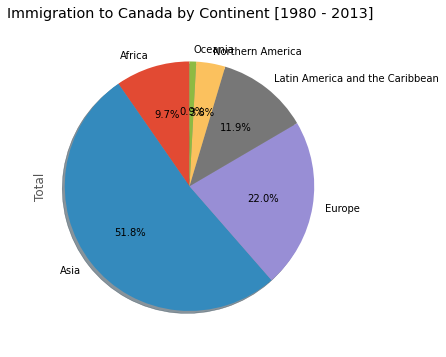

In [77]:
# Step 2: Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:

# autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.
# startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
# shadow - Draws a shadow beneath the pie (to give a 3D feel).
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()


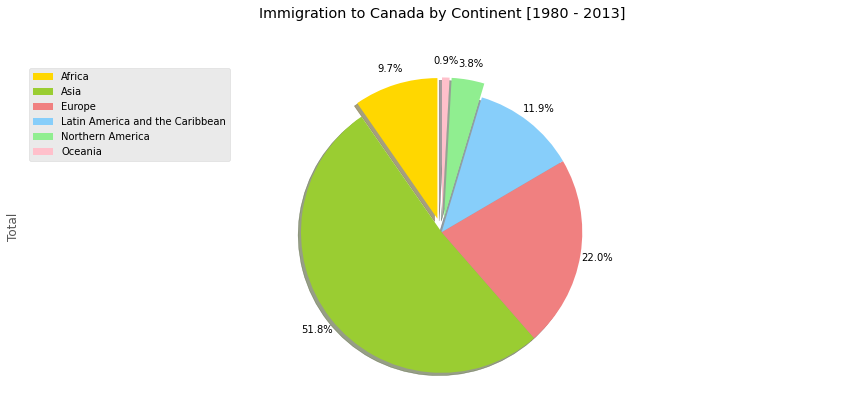

In [78]:
# The above visual is not very clear, the numbers and text overlap in some instances. make a few modifications to improve the visuals:

# Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().
# Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
# Pass in a custom set of colors for continents by passing in colors parameter.
# Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter.

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

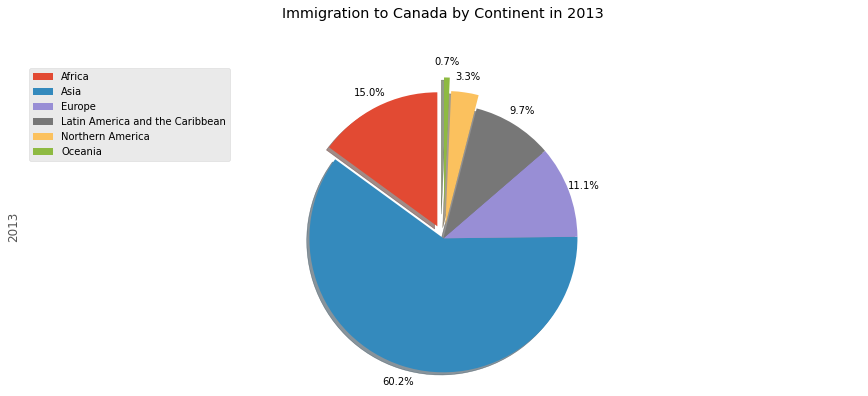

In [79]:
# Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

# Note: might need to play with the explore values in order to fix any overlapping slice values.

explode_list = [0.1, 0, 0, 0, 0.1, 0.2] 
# ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )
# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal')

# add legend
plt.legend(labels=df_continents.index, loc='upper left')

# show plot
plt.show()

In [80]:
# Box Plots is a way of statistically representing the distribution of the data through five main dimensions:

# Minimun: Smallest number in the dataset.
# First quartile: Middle number between the minimum and the median.
# Second quartile (Median): Middle number of the (sorted) dataset.
# Third quartile: Middle number between median and maximum.
# Maximum: Highest number in the dataset.

# To make a box plot, use kind=box in plot method invoked on a pandas series or dataframe.

# plot the box plot for the Japanese immigrants between 1980 - 2013.

# Step 1: Get the dataset. Even though extracting the data for just one country, will obtain it as a dataframe.  will help with calling the dataframe.describe() method to view the percentiles.
# to get a dataframe, place extra square brackets around 'Japan'.

df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()


,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


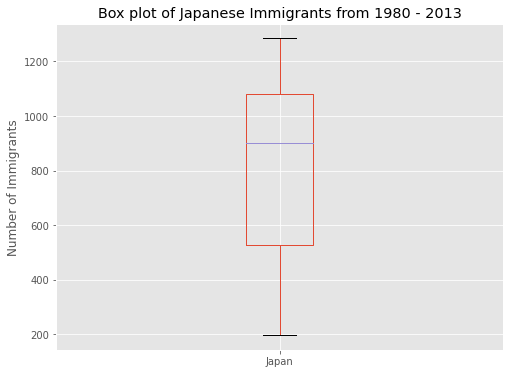

In [81]:
# Step 2: Plot by passing in kind='box'.

df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()


In [82]:
# can immediately make a few key observations from the plot above:
# The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
# 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
# 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

# can view the actual numbers by calling the describe() method on the dataframe.
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [83]:
# One of the key benefits of box plots is comparing the distribution of multiple datasets.

# previously, observed that China and India had very similar immigration trends. analyize these two countries further using box plots.
#Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

# Step 1: Get the dataset for China and India and call the dataframe df_CI.

df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [84]:
# view the percentages associated with both countries using the describe() method.

df_CI.describe()

,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


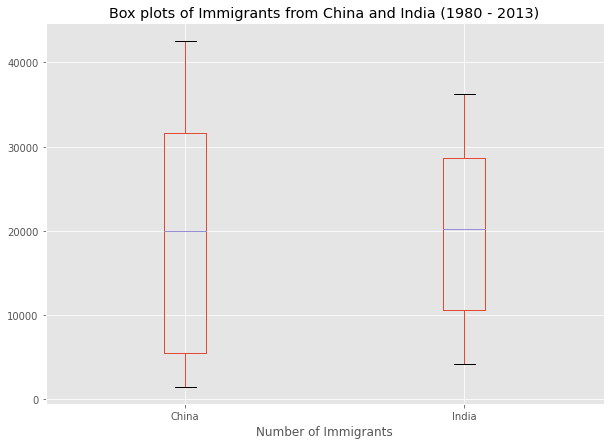

In [85]:
# Step 2: Plot data.

df_CI.plot(kind='box', figsize=(10, 7))
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.show()

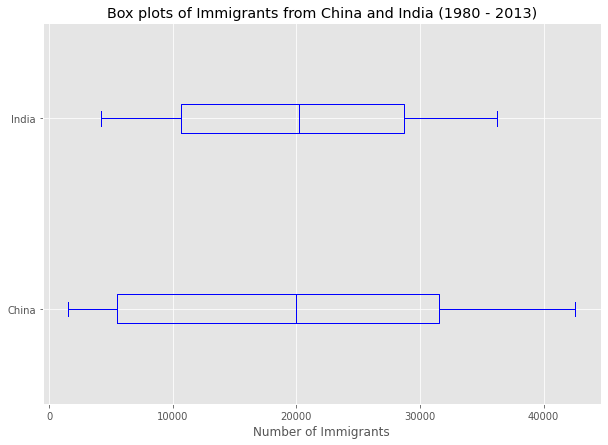

In [86]:
# can observe that, while both countries have around the same median immigrant population (~20,000), 
# China's immigrant population range is more spread out than India's. 
# The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

# to create horizontal box plots, pass the vert parameter in the plot function and assign it to False. can also specify a different color other then default red color.

# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

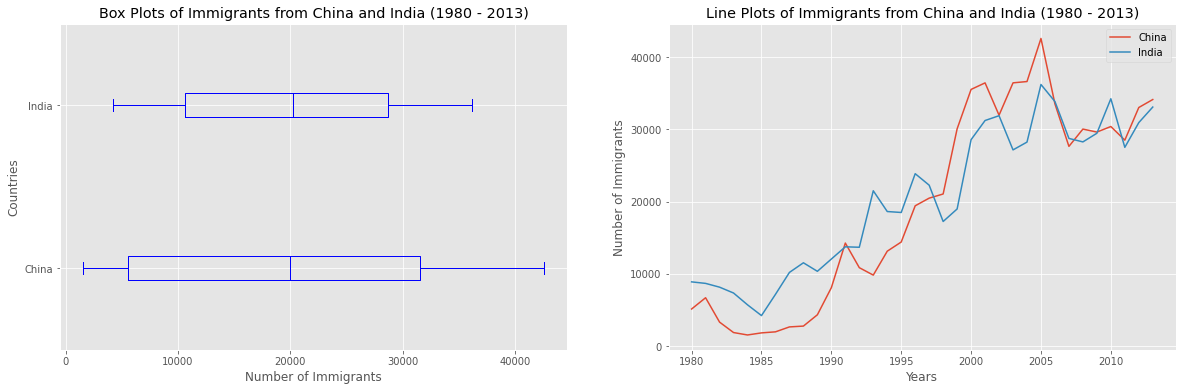

In [87]:
# Subplots - to plot multiple plots within the same figure. 
# For example, perform a side by side comparison of the box plot with the line plot of China and India's immigration.

# To visualize multiple plots together, create a figure (overall canvas) and divide it into subplots, each containing a plot. 
# With subplots, usually work with the artist layer instead of the scripting layer.

# Typical syntax is :

#    fig = plt.figure() # create figure
#    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
# Where
# nrows and ncols are used to notionally split the figure into (nrows * ncols) sub-axes,
# plot_number is used to identify the particular subplot that this function is to create within the notional grid. 
# plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols

# can then specify which subplot to place each plot by passing in the ax paramemter in plot() method

fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [88]:
#  * Tip regarding subplot convention **

# In the case when nrows, ncols, and plot_number are all less than 10, a convenience exists such that the a 3 digit number can be given instead, 
# where the hundreds represent nrows, the tens represent ncols and the units represent plot_number. For instance,
#   subplot(211) == subplot(2, 1, 1) 
# produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, 
# but conceptually this is how the returned subplot has been positioned).

# Previously identified the top 15 countries based on total immigration from 1980 - 2013.

# Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

# Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,2805,2979,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,6931,9211,16025,17040,16028,12145,6960,3550,2405,2136,1758,1488,1354,1471,1601,1447,1394,1533,1405,1263,1235,1267,1013,795,720,779,852,139241


In [89]:
# Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

# Create a list of all years in decades 80's, 90's, and 00's.
# Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
# Merge the three series into a new data frame. Call your dataframe new_df.

# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010)))

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})

# display dataframe
new_df.head()

,1980s,1990s,2000s
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [90]:
# learn more about the statistics associated with the dataframe using the describe() method.

new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


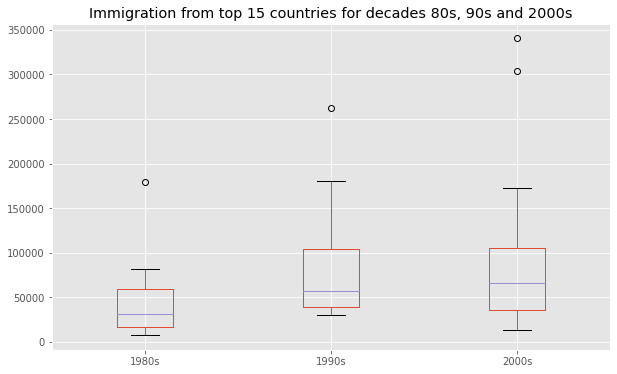

In [91]:
# Step 3: Plot the box plots.
new_df.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

In [92]:
# Note how the box plot differs from the summary table created. 
# The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:
# larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
# smaller than Q1 by at least 1.5 times the IQR.

# Look at decade 2000s as an example:
#Q1 (25%) = 36,101.5
#Q3 (75%) = 105,505.5
#IQR = Q3 - Q1 = 69,404

# Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.
# Outlier > 105,505.5 + (1.5 * 69,404)
# Outlier > 209,611.5

# check how many entries fall above the outlier threshold 
new_df[new_df['2000s']> 209611.5]

# China and India are both considered as outliers since their population for the decade exceeds 209,611.5.
# The box plot is an advanced visualizaiton tool

,1980s,1990s,2000s
India,82154,180395,303591
China,32003,161528,340385


In [93]:
# Scatter Plots (2D) is a useful method of comparing variables against each other. 
# Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph. 
# While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. 
# The data in a scatter plot is considered to express a trend. 
# With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

# start by exploring the following:
# Using a scatter plot, visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

# Step 1: Get the dataset. Since expecting to use the relationship between years and total population, convert years to int type.

# can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


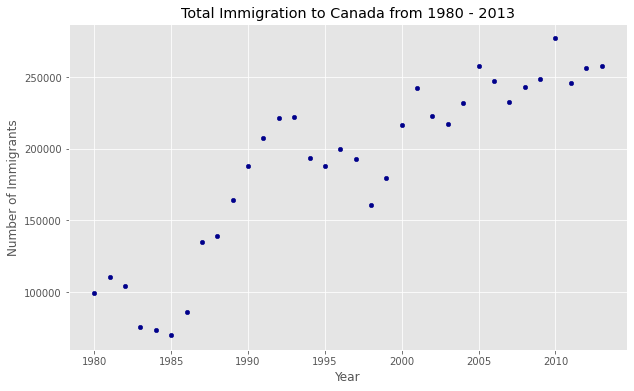

In [94]:
# Step 2: Plot the data. In Matplotlib, can create a scatter plot set by passing in kind='scatter' as plot argument. 
# will also need to pass in x and y keywords to specify the columns that go on the x- and the y-axis.

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [95]:
# Notice how the scatter plot does not connect the datapoints together. 
# can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. 
# can mathematically analyze this upward trend using a regression line (line of best fit).

# plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

# Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:
# x: x-coordinates of the data.
# y: y-coordinates of the data.
# deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

# The output is an array with the polynomial coefficients, highest powers first. 
# Since plotting a linear regression y= a*x + b, output has 2 elements [5.56709228e+03, -1.09261952e+07] with the the slope in position 0 and intercept in position 1.


array([ 5.56709228e+03, -1.09261952e+07])

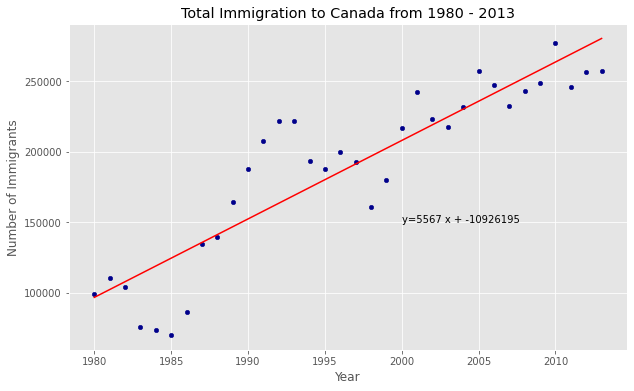

'No. Immigrants = 5567 * Year + -10926195'

In [96]:
# Step 2: Plot the regression line on the scatter plot.

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

In [97]:
# Conclusions - Using the equation of line of best fit, can estimate the number of immigrants in 2015:

# No. Immigrants = 5567 * Year - 10926195
# No. Immigrants = 5567 * 2015 - 10926195
# No. Immigrants = 291,310
# When compared to the actuals from Citizenship and Immigration Canada's (CIC) 2016 Annual Report, see that Canada accepted 271,845 immigrants in 2015. 
# estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

# As a side note, can observe that immigration took a dip around 1993 - 1997. 
# Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. 
# Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, 
# making it more difficult for family members (other than nuclear family) to immigrate to Canada. 
# These restrictive measures had a direct impact on the immigration numbers for the next several years.


In [98]:
# Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?
# Step 1: Get the data:

# Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
# Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe df_total.
# Reset the index in place.
# Rename the columns to year and total.
# Display the resulting dataframe.

# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


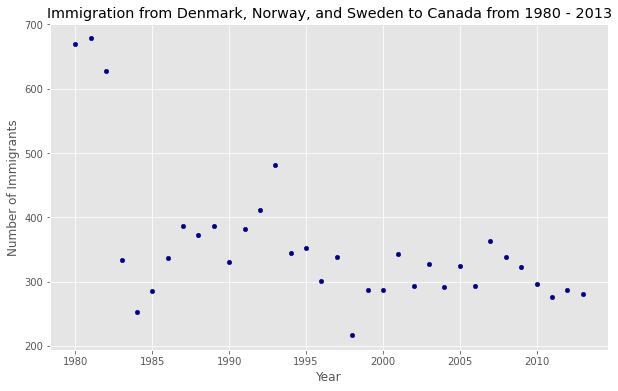

In [99]:
# Step 2: Generate the scatter plot by plotting the total versus year in df_total.

# generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants') 

# show plot
plt.show()

In [100]:
# Bubble Plots - A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). 
# The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. 
# In maplotlib, can pass in an array or scalar to the keyword s to plot(), that contains the weight of each point.

# start by analyzing the effect of Argentina's great depression.
# Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. 
# In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

# analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. 
# do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. 
# set the weights for the bubble as the normalized value of the population for each year.

# Step 1: Get the data for Brazil and Argentina. Like previously, will convert the Years to type int and bring it in the dataframe.

df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# label the index. This will automatically be the column name when reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,Kiribati,Andorra,Nauru,Canada,Monaco,Maldives,Liechtenstein,Equatorial Guinea,Papua New Guinea,Samoa,Guinea-Bissau,Montenegro,Lesotho,Tonga,Qatar,Mozambique,Swaziland,Comoros,Cabo Verde,Luxembourg,Oman,"China, Macao Special Administrative Region",Malawi,Turkmenistan,Namibia,Democratic People's Republic of Korea,Botswana,Bahrain,Tajikistan,Slovenia,...,Syrian Arab Republic,Turkey,Peru,Ethiopia,Jordan,Nigeria,South Africa,Somalia,Trinidad and Tobago,Ukraine,El Salvador,Afghanistan,Mexico,Russian Federation,Germany,Bangladesh,Israel,Algeria,Iraq,Colombia,Morocco,Egypt,Portugal,Guyana,Haiti,Romania,Viet Nam,Jamaica,France,Lebanon,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,1,2,0,0,4,0,1,14,0,0,5,0,0,1,10,0,0,0,...,315,481,317,98,177,81,1026,7,958,0,110,16,409,0,1626,83,1403,80,262,266,325,612,4473,2334,1666,375,1191,3198,1729,1409,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4,0,2,7,0,0,1,4,0,0,1,2,1,4,0,0,4,0,5,1,1,2,0,0,...,419,874,456,59,160,60,1118,10,947,0,295,39,394,0,1977,84,1711,67,245,326,471,660,3486,2943,3692,438,1829,2634,2027,1119,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,4,0,0,1,7,0,7,1,2,2,2,0,0,6,0,5,3,3,1,0,0,...,409,706,401,54,155,58,781,7,972,0,882,39,491,0,3062,86,1334,71,260,360,447,755,2432,3575,3498,583,2162,2661,2219,1159,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,1,0,0,2,1,0,2,0,0,0,5,8,0,3,0,3,1,3,1,0,0,...,269,280,241,98,113,58,379,12,766,0,2587,47,490,0,2376,81,541,69,380,244,335,455,1433,2650,2860,543,3404,2455,1490,789,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,0,7,2,0,3,10,0,11,1,0,0,2,0,2,4,7,1,0,0,...,264,338,306,154,102,78,271,14,606,0,2666,71,509,0,1610,98,446,63,428,235,248,447,1398,1932,1418,524,7583,2508,1169,1253,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [101]:
# Step 2: Create the normalized weights.

# There are several methods of normalizations in statistics, each with its own use. 
# In this case, we will use feature scaling to bring all values into the range [0,1]. The general formula is:
# where X is an original value, X' is the normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. 
# The rest of the datapoints are scaled to a value between 0-1 accordingly.

# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

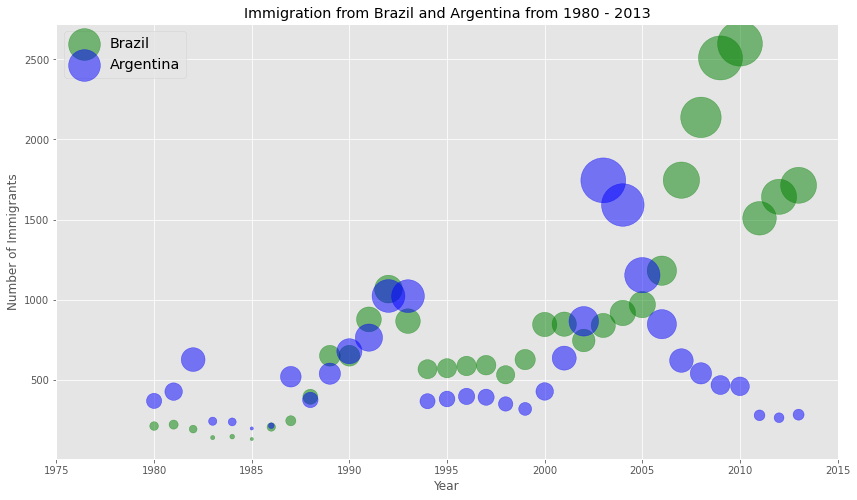

In [102]:
# Step 3: Plot the data.
# To plot two different scatter plots in one plot, include the axes one plot into the other by passing it via the ax parameter.
# will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore will:
# multiply weights by 2000 to scale it up on the graph, and,
# add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [103]:
# The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. 
# The larger the bubble, the more immigrants in that year.
#Conlusion
# From the plot above, can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. 
# can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression.

# On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. 
# There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. 
# The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010.
# The immigration data reflect these events.


In [104]:
# Previously created box plots to compare immigration from China and India to Canada. 
# Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. 
# can use df_can_t that defined and used in the previous example.

# Step 1: Normalize the data pertaining to China and India.

# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

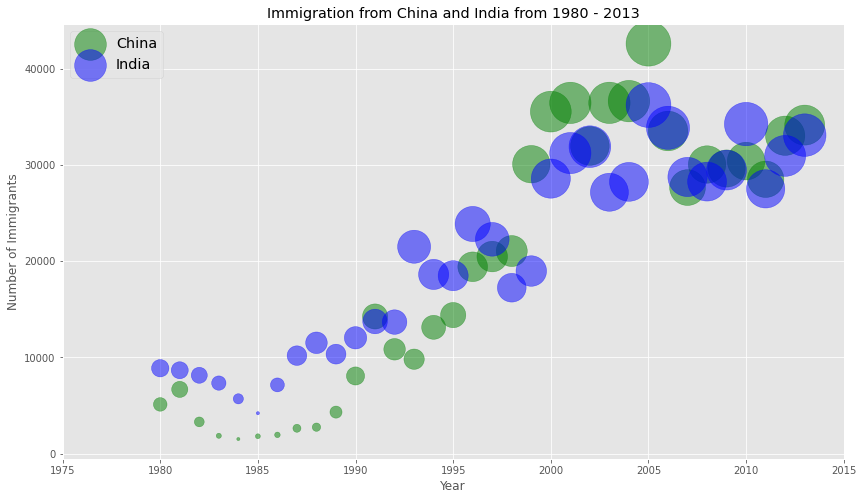

In [105]:
# Step 2: Generate the bubble plots.

# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

In [106]:
# Waffle Chart - is an interesting visualization that is normally created to display progress toward goals. 
# It is commonly an effective option when trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

# revisit the previous case study about Denmark, Norway, and Sweden.

# create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# take a look at dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866


In [107]:
# Unfortunately, unlike R, waffle charts are not built into any of the Python visualization libraries. Therefore, create them from scratch.

# Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [108]:
# Step 2. The second step is defining the overall size of the waffle chart.

width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [109]:
# Step 3. The third step is using the proportion of each category to determe it respective number of tiles

# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [110]:
# Based on the calculated proportions, Denmark will occupy 129 tiles of the waffle chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.

# Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [111]:
# take a look at how the matrix looks like.

waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

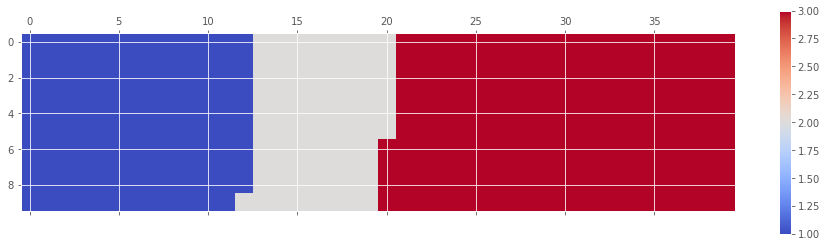

In [112]:
# As expected, the matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.

# Step 5. Map the waffle chart matrix into a visual.
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], <a list of 0 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

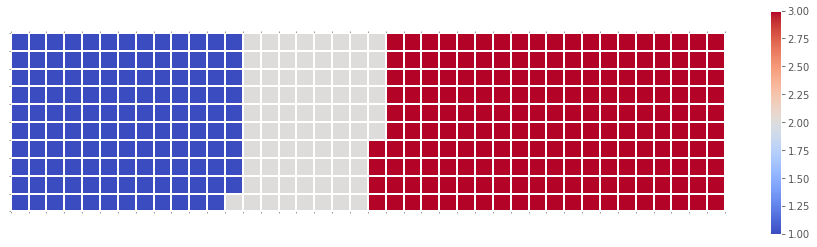

In [113]:
# Step 6. Prettify the chart.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

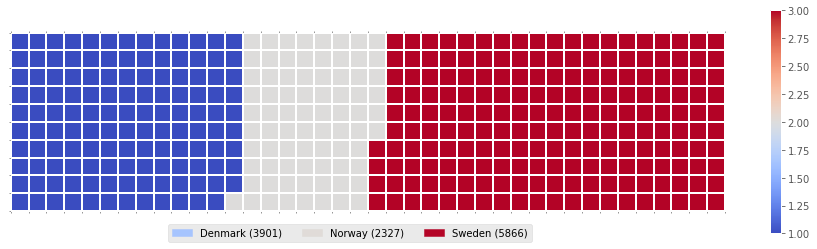

In [114]:
import matplotlib.patches as mpatches # needed for waffle Charts

# Step 7. Create a legend and add it to chart.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

# And there it is, a good looking waffle chart.

In [115]:
# There seems to be a new Python package for generating waffle charts called PyWaffle, but it looks like the repository is still being built.
# it would very inefficient to repeat these seven steps every time to create a waffle chart. So combine all seven steps into one function called create_waffle_chart. 
# This function would take the following parameters as input:

# categories: Unique categories or classes in dataframe.
# values: Values corresponding to categories or classes.
# height: Defined height of waffle chart.
# width: Defined width of waffle chart.
# colormap: Colormap class
# value_sign: In order to make our function more generalizable, will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

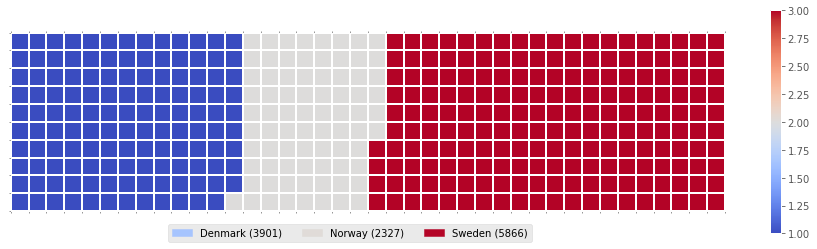

In [116]:
# Now to create a waffle chart, call the function create_waffle_chart. define the input parameters:

width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

# And now call the function to create a waffle chart.

create_waffle_chart(categories, values, height, width, colormap)

In [117]:
# Word Clouds (also known as text clouds or tag clouds) work in a simple way: 
# the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

# Luckily, a Python package already exists for generating word clouds. 
# The package, called word_cloud was developed by Andreas Mueller to generate a word cloud for a given text document.

# First, install the package.

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!


In [118]:
# Unfortunately, immmigration data does not have any text data, but where there is a will there is a way. 
# generate sample text data from immigration dataset, say text data of 90 words.

# recall how data looks like.
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5


In [119]:
# And what was the total immigration from 1980 to 2013?

total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [120]:
# Using countries with single-word names, duplicate each country's name based on how much they contribute to the total immigration.

max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Colombia Morocco Egypt Portugal Guyana Haiti Romania Jamaica France Lebanon Poland Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines China China China China China China China China China India India India India India India India India India '

In [121]:
# not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.

# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


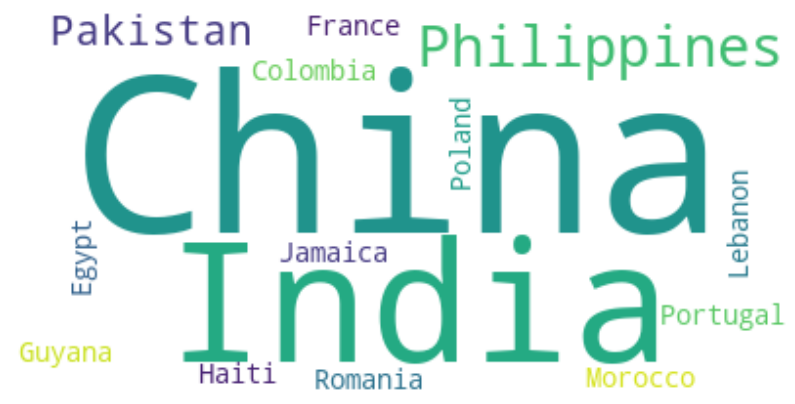

In [122]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# According to the word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud. 
# One cool visual that you could build, is perhaps using the map of Canada and a mask and superimposing the word cloud on top of the map of Canada. 
# That would be an interesting visual to build!

In [123]:
# Regression Plots
# Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

# Used Pie Charts, Box Plots, Scatter Plots, and Bubble Plots, created a scatter plot and then fit a regression line. 
# It took ~20 lines of code to create the scatter plot along with the regression fit. 
# In this section, will explore seaborn and see how efficient it is to create regression lines and fits using this library

# first install seaborn
!conda install -c anaconda seaborn --yes

# import library
import seaborn as sns

print('Seaborn installed and imported!')

/bin/bash: conda: command not found
Seaborn installed and imported!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [124]:
# Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

# can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


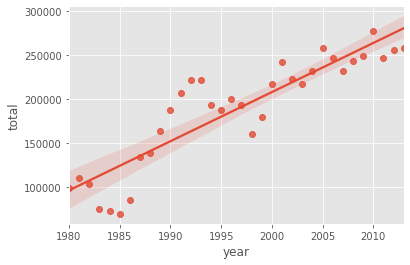

In [125]:
# With seaborn, generating a regression plot is as simple as calling the regplot function.

import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

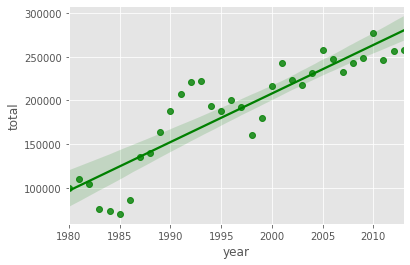

In [126]:
# can also customize the color of the scatter plot and regression line. change the color to green.

import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

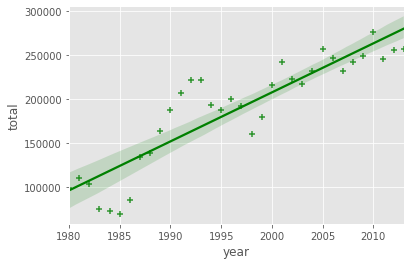

In [127]:
# can also customize the marker shape, so instead of circular markers, use '+'.

import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

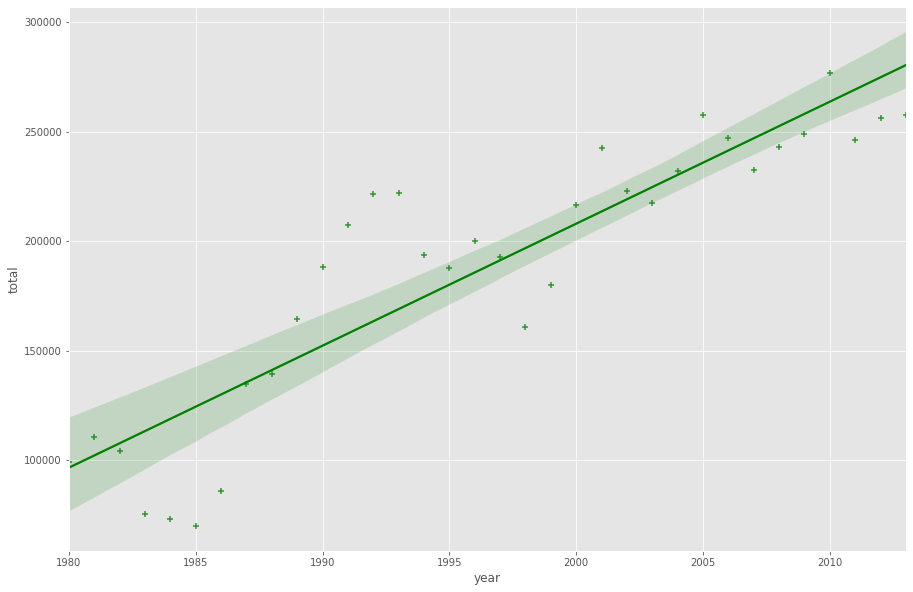

In [128]:
# blow up the plot a little bit so that it is more appealing to the sight.

plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

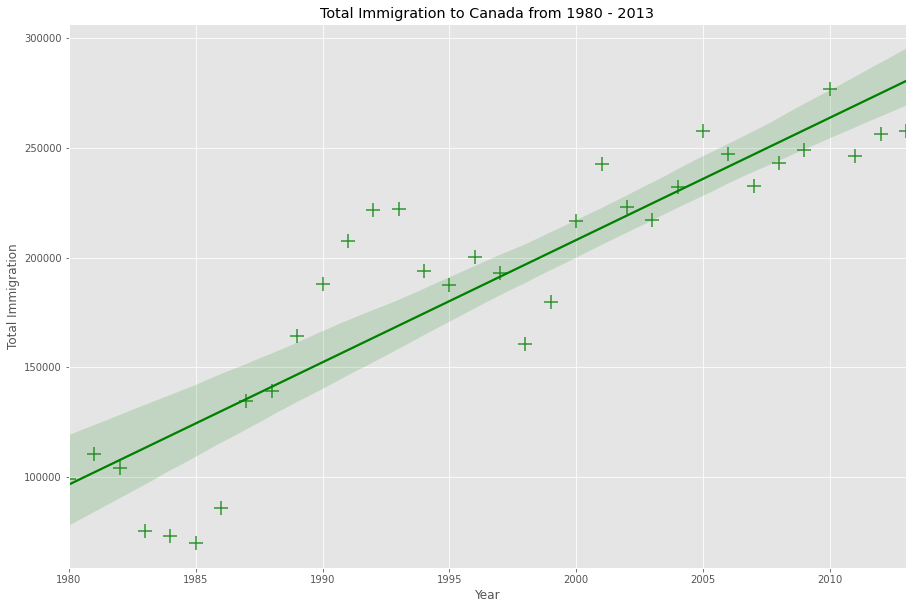

In [129]:
# And increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.

plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

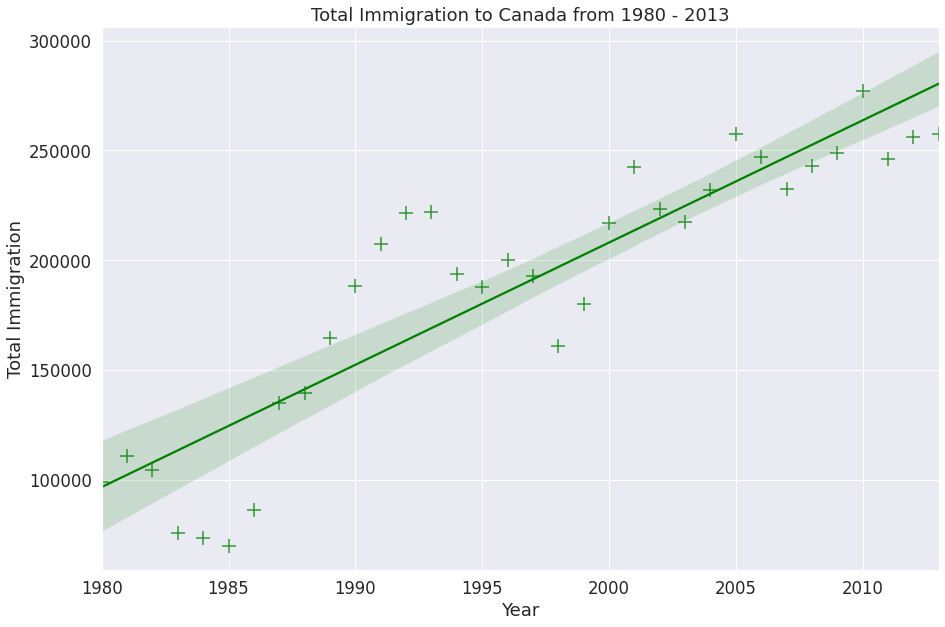

In [130]:
# And finally increase the font size of the tickmark labels, the title, and the x- and y-labels 

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

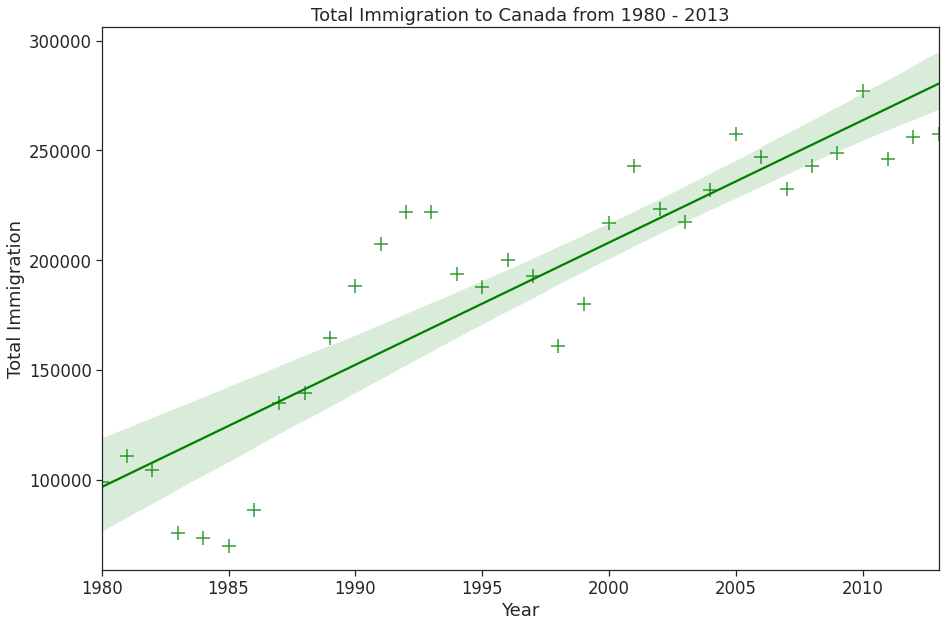

In [131]:
# A complete scatter plot with a regression fit with 5 lines of code only. amazing.

# If not a big fan of the purple background, can easily change the style to a white plain background.

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

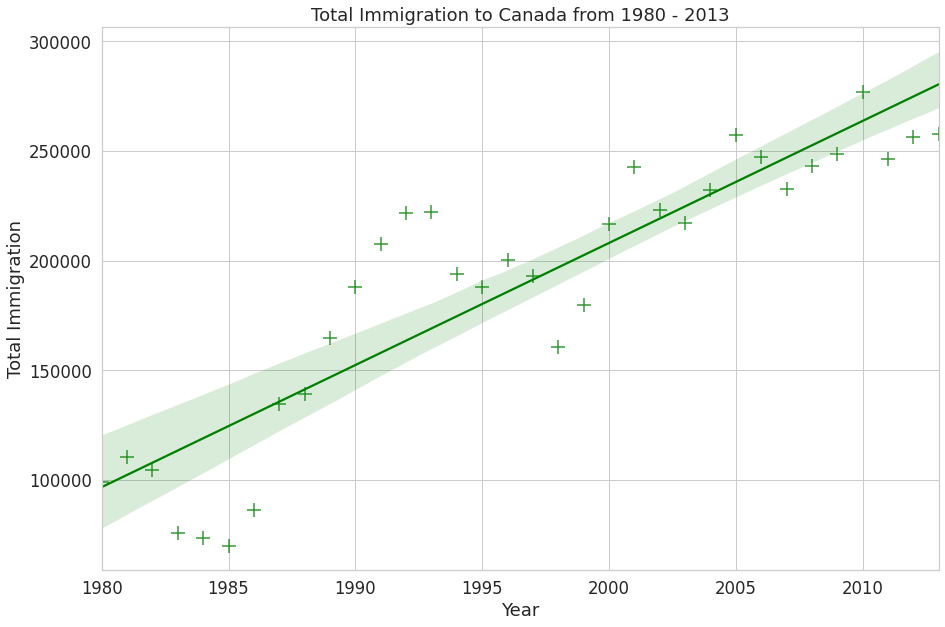

In [132]:
# Or to a white background with gridlines.

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

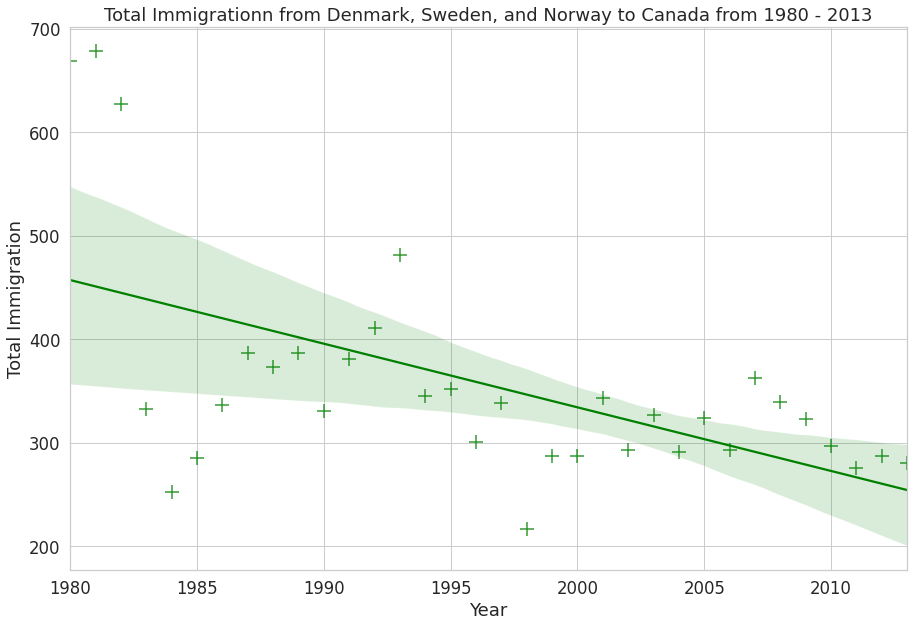

In [133]:
# Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# define figure size
plt.figure(figsize=(15, 10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

In [134]:
# Exploring Datasets with pandas and Matplotlib
# Toolkits: relies on pandas and Numpy for data wrangling, analysis, and visualization. primary plotting library to explore for this data is Folium.

# Generating Maps with Python - create maps for different objectives. 
# To do that, work with another Python visualization library, namely Folium. 
# Folium was developed for the sole purpose of visualizing geospatial data. 
# While other libraries are available to visualize geospatial data, such as plotly, they might have a cap on how many API calls you can make within a defined time frame. 
# Folium, on the other hand, is completely free.

# Introduction to Folium
# Folium is a powerful Python library that helps create several types of Leaflet maps. 
# The fact that the Folium results are interactive makes this library very useful for dashboard building.

# From the official Folium documentation page:
# Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. 
# Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

# Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. 
# It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

# The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. 
# Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

# install Folium
# Folium is not available by default. So, first need to install it before veing able to import it.

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

/bin/bash: conda: command not found
Folium installed and imported!


In [135]:
# Choropleth Maps - is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, 
# such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area or it shows the level of variability
# within a region. 

# create Choropleth map of the world depicting immigration from various countries to Canada.

df_map1 = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

# clean up the dataset to remove unnecessary columns (eg. REG) 
df_map1.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_map1.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_map1.columns = list(map(str, df_map1.columns))

# add total column
df_map1['Total'] = df_map1.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_map1.shape)

# In order to create a Choropleth map, need a GeoJSON file that defines the areas/boundaries of the state, county, or country that are interested in. 
# since endeavoring to create a world map, want a GeoJSON that defines the boundaries of all world countries. 
# For convenience, will be providing this file, and download it. name it world_countries.json.

# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')


Data downloaded and read into a dataframe!
data dimensions: (195, 39)
GeoJSON file downloaded!


In [136]:
# Now that have the GeoJSON file, create a world map, centered around [0, 0] latitude and longitude values, with an intial zoom level of 2.

world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map

In [137]:
# And now create a Choropleth map, will use the choropleth method with the following main parameters:
# geo_data, which is the GeoJSON file.
# data, which is the dataframe containing the data.
# columns, which represents the columns in the dataframe that will be used to create the Choropleth map.
# key_on, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. 

# To determine that, will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries,
# since the countries are our variable of interest. In this case, name is the key in the GeoJSON file that contains the name of the countries. 
# Note that this key is case_sensitive, so need to pass exactly as it exists in the GeoJSON file.


In [138]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
# Use  folium.Choropleth(args*).add_to(world_map) 
folium.Choropleth(
    geo_data=world_geo,
    data=df_map1,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

# display map
world_map

# As per Choropleth map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. 
# Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and the US.

In [139]:
# Notice how the legend is displaying a negative boundary or threshold. 
# fix that by defining our own thresholds and starting with 0 instead of -6,918

world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_map1['Total'].min(),
                              df_map1['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale. Use  folium.Choropleth(args*).add_to(world_map) 
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Stamen Terrain')
folium.Choropleth(
    geo_data=world_geo,
    data=df_map1,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
).add_to(world_map)

world_map

In [140]:
 # perhaps create Choropleth maps for individuals years, decades, and see how they compare with the entire period from 1980 to 2013.
